In [1]:
import numpy as np
import pandas as pd
import altair as alt
from altair import datum

In [9]:
data = pd.read_excel("Data/Ne phase shift diffs.xlsx", sheet_name=None)

for k, df in data.items():
    if "KE (eV)" in df:
        df["KE (eV)"] = df["KE (eV)"].apply("{:.1f}".format)
    if k == "TDCASSCF":
        where = ((df["Group"].isin({"G1430", "G1590", "G1910"}))
                 & (df["Config"] == "sum[m]"))
        data[k] = df[where]
        
data["Measured"].head()

,Method,Dataset,Dataset / KE (eV),Photon energy (eV),KE (eV),Config,Polar ang fr (deg),Polar ang to (deg),Polar ang (rad),Polar ang (deg),Phase shift (rad),Phase shift (deg),Phase shift err (rad),Phase shift err (deg),Phase shift fr (deg),Phase shift to (deg)
0,Measured,good1,7.2,15.9,7.2,sum[m],0,5,0.043633,2.5,0.970825,55.624165,0.089057,5.102609,50.521557,60.726774
1,Measured,good1,7.2,15.9,7.2,sum[m],5,10,0.130900,7.5,1.210234,69.341298,0.096733,5.542411,63.798887,74.883708
2,Measured,good1,7.2,15.9,7.2,sum[m],10,15,0.218166,12.5,1.003316,57.485799,0.072731,4.167181,53.318618,61.652980
3,Measured,good1,7.2,15.9,7.2,sum[m],15,20,0.305433,17.5,1.219222,69.856297,0.061948,3.549380,66.306917,73.405677
4,Measured,good1,7.2,15.9,7.2,sum[m],20,25,0.392699,22.5,1.113591,63.804061,0.116181,6.656709,57.147352,70.460770


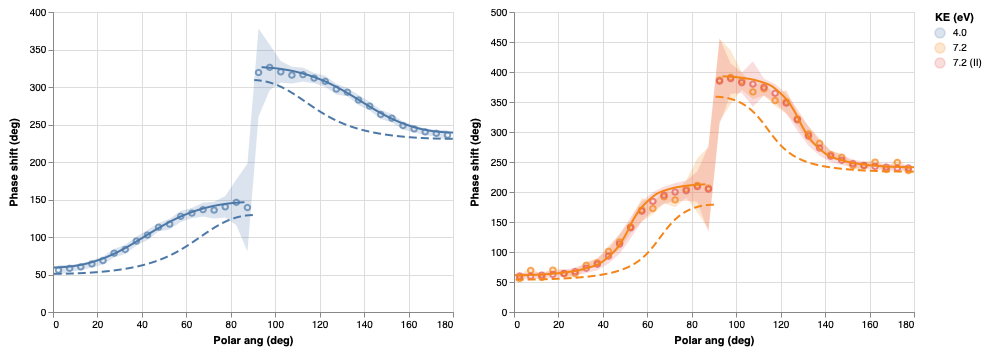

In [6]:
base = {k: alt.Chart(data[k]) for k in ("Measured", "TDCASSCF", "Perturb")}

chart = alt.hconcat()
for ke in ("4.0", "7.2"):
    fig = (
        base["Measured"].mark_area(opacity=0.2).encode(
            x="Polar ang (deg):Q",
            y=alt.Y("Phase shift fr (deg):Q", axis=alt.Axis(title="Phase shift (deg)")),
            y2="Phase shift to (deg):Q",
            color=alt.Color("Dataset / KE (eV):N", title="KE (eV)"),
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["Measured"].mark_point().encode(
            x="Polar ang (deg)",
            y="Phase shift (deg)",
            color=alt.Color("Dataset / KE (eV):N", title="KE (eV)"),
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["TDCASSCF"].mark_line(interpolate="monotone").encode(
            x="Polar ang (deg):Q",
            y="Phase shift (deg):Q",
            color="KE (eV):N",
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["Perturb"].mark_line(interpolate="monotone", strokeDash=[8, 4]).encode(
            x="Polar ang (deg)",
            y="Phase shift (deg)",
            color="KE (eV):N",
        ).transform_filter(datum["KE (eV)"] == ke)
    )
    chart = chart | fig
chart

In [10]:
data = pd.read_excel("Data/Ne EWS delay diffs.xlsx", sheet_name=None)

for k, df in data.items():
    if "KE range (eV)" in df:
        where = df["KE range (eV)"].isin({"04.0--07.2"})
        data[k] = df[where]
    if "Config" in df:
        where = df["Config"].isin({"sum[m]"})
        data[k] = df[where]

data["Measured"].head()

,Method,Photon energy fr (eV),Photon energy to (eV),KE range (eV),Polar ang fr (deg),Polar ang to (deg),Polar ang (deg),EWS delay (as),EWS delay err (as),EWS delay fr (as),EWS delay to (as)
0,Measured,14.3,15.9,04.0--07.2,0,5,2.5,7.558801,27.092306,-19.533505,34.651108
1,Measured,14.3,15.9,04.0--07.2,5,10,7.5,21.917916,21.266222,0.651695,43.184138
2,Measured,14.3,15.9,04.0--07.2,10,15,12.5,-4.644393,19.656976,-24.301369,15.012583
3,Measured,14.3,15.9,04.0--07.2,15,20,17.5,13.230580,20.140653,-6.910073,33.371233
4,Measured,14.3,15.9,04.0--07.2,20,25,22.5,-16.038608,25.070851,-41.109460,9.032243


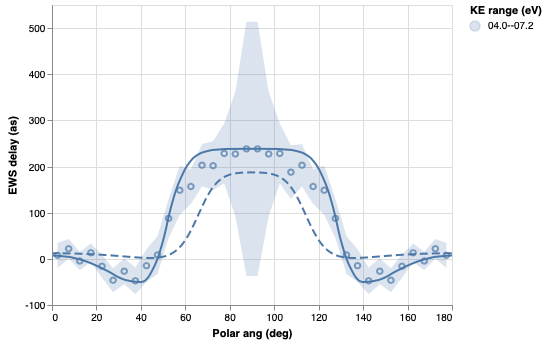

In [11]:
base = {k: alt.Chart(data[k]) for k in ("Measured", "TDCASSCF", "Perturb")}

(
    base["Measured"].mark_area(opacity=0.2).encode(
        x="Polar ang (deg)",
        y=alt.Y("EWS delay fr (as)", axis=alt.Axis(title="EWS delay (as)")),
        y2="EWS delay to (as)",
        color="KE range (eV)",
    )
    + base["Measured"].mark_point().encode(
        x="Polar ang (deg)",
        y="EWS delay (as)",
        color="KE range (eV)",
    )
    + base["TDCASSCF"].mark_line(interpolate="monotone").encode(
        x="Polar ang (deg)",
        y="EWS delay (as)",
        color="KE range (eV)",
    )
    + base["Perturb"].mark_line(interpolate="monotone", strokeDash=[8, 4]).encode(
        x="Polar ang (deg)",
        y="EWS delay (as)",
        color="KE range (eV)",
    )
).interactive(bind_x=False)